<a href="https://colab.research.google.com/github/GODxFATHER/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Importing Librabries

In [ ]:
# Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
from scipy import stats
from scipy.stats import norm, skew


In [ ]:
# # Configuration for matplotlib graphs

# matplotlib.rcParams['font.size'] = 12
# matplotlib.rcParams['figure.figsize'] = (13, 7)
# matplotlib.rcParams['figure.facecolor'] = '#00000000'
# sns.set_style('darkgrid');

#Loading the Dataset

In [ ]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the csv file into pandas dataframe

# path_r = "/content/drive/MyDrive/EDA - Capstone Project/Airbnb NYC 2019.csv"
path_p = '/content/SeoulBikeData.csv'
path_n = "/content/drive/MyDrive/DATA_FILES/SeoulBikeData.csv"
df = pd.read_csv(path_n, encoding= 'unicode_escape')

#EDA on features

In [ ]:
#rows and columns in dataset
df.shape

(8760, 14)

So we have 8769 Rows and 14 features

In [ ]:
#printing the first 5 rows of dataset
df.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

In [ ]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Here we see the following columns are objects: -**

* **Date**
* **Season**
* **Holiday**
* **Functionaing day**

**So we to convert them into datetime data type.**

**Date convert to Datetime**

**Rest we see later**

In [ ]:
# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])

#let's check 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
#checking for duplicacy in the dataset
df.duplicated().sum()

0

* **The dataset doesn't contain any duplicate rows.**

##Let's Check for null values

In [ ]:
#checking the missing data in the dataset
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **The dateset dont't have null values**

In [ ]:
#dataset descriptive statistics

df.describe()

Rented Bike Count         Hour  ...  Rainfall(mm)  Snowfall (cm)
count        8760.000000  8760.000000  ...   8760.000000    8760.000000
mean          704.602055    11.500000  ...      0.148687       0.075068
std           644.997468     6.922582  ...      1.128193       0.436746
min             0.000000     0.000000  ...      0.000000       0.000000
25%           191.000000     5.750000  ...      0.000000       0.000000
50%           504.500000    11.500000  ...      0.000000       0.000000
75%          1065.250000    17.250000  ...      0.000000       0.000000
max          3556.000000    23.000000  ...     35.000000       8.800000

[8 rows x 10 columns]

In [ ]:
#dataset columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#renaming dataset columns
bike_df = df.rename( columns = { "Rented Bike Count":"Rented_Bike_Count",
                   "Temperature(°C)":"Temperature",
                   "Humidity(%)":"Humidity",
                   "Wind speed (m/s)":"Wind_speed",
                   "Visibility (10m)":"Visibility",
                   "Dew point temperature(°C)":"Dew_point_temperature",
                   "Solar Radiation (MJ/m2)":"Solar_Radiation",
                   "Rainfall(mm)":"Rainfall",
                   "Snowfall (cm)":"Snowfall",
                   "Functioning Day":"Functioning_Day" } )
bike_df.head(1)

Date  Rented_Bike_Count  Hour  ...  Seasons     Holiday  Functioning_Day
0 2017-01-12                254     0  ...   Winter  No Holiday              Yes

[1 rows x 14 columns]

In [ ]:
#year columns
bike_rent = bike_df.copy()
bike_rent['year'] = bike_rent['Date'].dt.year
#month column 
bike_rent['month'] = bike_rent['Date'].dt.month_name() 
#day columns
bike_rent['day'] = bike_rent['Date'].dt.day
#weekday columns
bike_rent['weekday'] = bike_rent['Date'].dt.day_name() 
#quarter columns
# bike_rent['quarter'] = bike_rent['Date'].dt.quarter   
 

##Let's explore Coloumns

##Univariate

In [ ]:
bike_rent.head(1)

Date  Rented_Bike_Count  Hour  ...    month  day   weekday
0 2017-01-12                254     0  ...  January   12  Thursday

[1 rows x 18 columns]

In [ ]:
# Numeical features

num_attribs = bike_rent.describe().columns
num_attribs

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'year', 'day'],
      dtype='object')

Text(0.5, 1.0, 'boxplot')

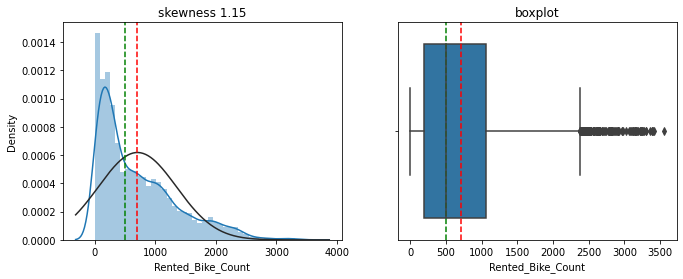

In [ ]:
# Distribution of Dependent Variable 

col = 'Rented_Bike_Count'

plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
sns.distplot(bike_rent[col], kde=True, fit=norm)
plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  
plt.title(f'skewness {round(bike_rent[col].skew(),2)}')

plt.subplot(1, 2, 2)
sns.boxplot(bike_rent[col])
plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  

plt.title('boxplot') 

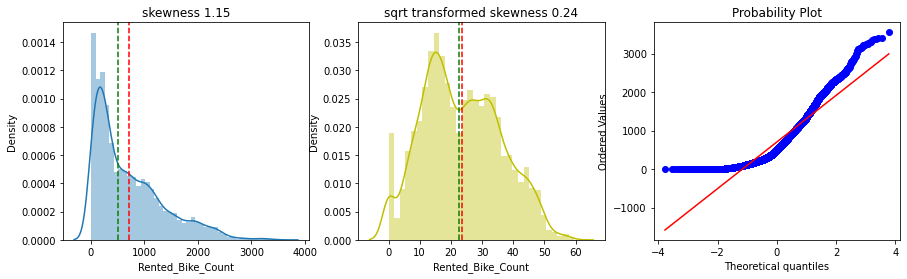

In [ ]:
# Distribution of Dependent Variable after transformation

col = 'Rented_Bike_Count'
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
sns.distplot(bike_rent[col], kde=True)
plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  
plt.title(f'skewness {round(bike_rent[col].skew(),2)}')

plt.subplot(1, 3, 2)
sns.distplot(np.sqrt(bike_rent[col]), kde=True, color="y")
plt.axvline(np.median(np.sqrt(bike_rent[col])), color='g', linestyle='--')
plt.axvline(np.mean(np.sqrt(bike_rent[col])),color='r', linestyle='--')
plt.title(f'sqrt transformed skewness {round((np.sqrt(bike_rent[col])).skew(),2)}')

plt.subplot(1,3,3)
stats.probplot(bike_rent[col], plot=plt)
plt.show()

plt.show()

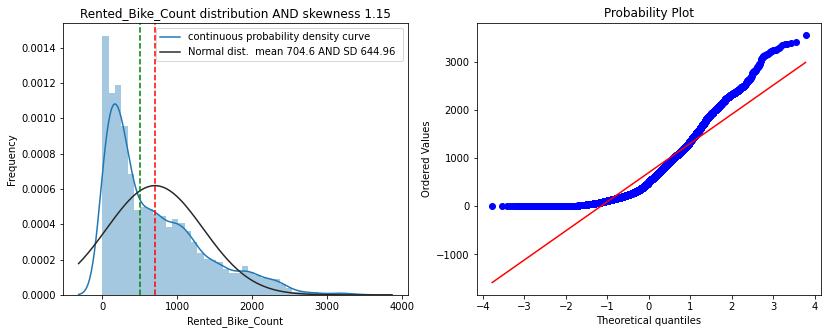

In [ ]:

col='Rented_Bike_Count'
mean = round(norm.fit(bike_rent[col])[0],2)
sd = round(norm.fit(bike_rent[col])[1],2)

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)

sns.distplot(bike_rent[col] , fit=norm, kde =True)
plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  
# plt.title(f'skewness {round(bike_rent[col].skew(),2)}')
plt.legend(['continuous probability density curve', f'Normal dist.  mean {mean} AND SD {sd} '] , loc='best')
plt.ylabel('Frequency') 
plt.title(f'{col} distribution AND skewness {round(bike_rent[col].skew(),2)}')

plt.subplot(1,3,2)
stats.probplot(bike_rent[col], plot=plt)
plt.show()

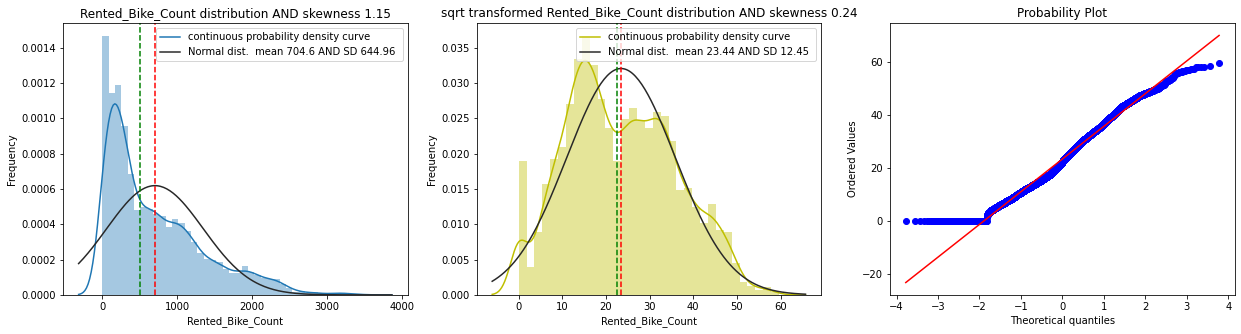

In [ ]:

col='Rented_Bike_Count'

mean = round(norm.fit(bike_rent[col])[0],2)
sd = round(norm.fit(bike_rent[col])[1],2)

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)

sns.distplot(bike_rent[col] , fit=norm, kde =True)
plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  
# plt.title(f'skewness {round(bike_rent[col].skew(),2)}')
plt.legend(['continuous probability density curve', f'Normal dist.  mean {mean} AND SD {sd} '] , loc='best')
plt.ylabel('Frequency') 
plt.title(f'{col} distribution AND skewness {round(bike_rent[col].skew(),2)}')

plt.subplot(1,3,2)

mean = round(norm.fit(np.sqrt(bike_rent[col]))[0],2)
sd = round(norm.fit(np.sqrt(bike_rent[col]))[1],2)

sns.distplot(np.sqrt(bike_rent[col]) , fit=norm, kde =True, color="y")
plt.axvline(np.median(np.sqrt(bike_rent[col])),color='g', linestyle='--')
plt.axvline(np.mean(np.sqrt(bike_rent[col])),color='r', linestyle='--')  
# plt.title(f'skewness {round(bike_rent[col].skew(),2)}')
plt.legend(['continuous probability density curve', f'Normal dist.  mean {mean} AND SD {sd} '] , loc='best')
plt.ylabel('Frequency') 
plt.title(f'sqrt transformed {col} distribution AND skewness {round(np.sqrt(bike_rent[col]).skew(),2)}')

plt.subplot(1,3,3)

stats.probplot(np.sqrt(bike_rent[col]), plot=plt)

plt.show()

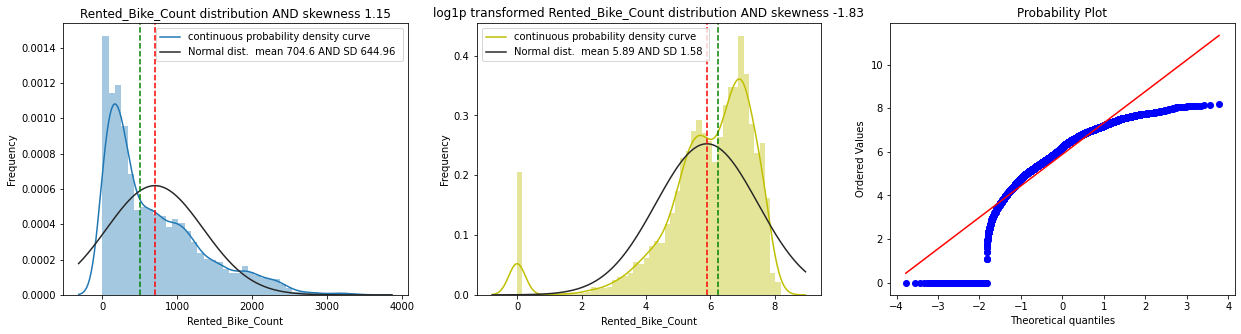

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

col='Rented_Bike_Count'

mean = round(norm.fit(bike_rent[col])[0],2)
sd = round(norm.fit(bike_rent[col])[1],2)

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)

sns.distplot(bike_rent[col] , fit=norm, kde =True)
plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  
# plt.title(f'skewness {round(bike_rent[col].skew(),2)}')
plt.legend(['continuous probability density curve', f'Normal dist.  mean {mean} AND SD {sd} '] , loc='best')
plt.ylabel('Frequency') 
plt.title(f'{col} distribution AND skewness {round(bike_rent[col].skew(),2)}')

plt.subplot(1,3,2)

mean = round(norm.fit(np.log1p(bike_rent[col]))[0],2)
sd = round(norm.fit(np.log1p(bike_rent[col]))[1],2)

sns.distplot(np.log1p(bike_rent[col]) , fit=norm, kde =True, color="y")
plt.axvline(np.median(np.log1p(bike_rent[col])),color='g', linestyle='--')
plt.axvline(np.mean(np.log1p(bike_rent[col])),color='r', linestyle='--')  
# plt.title(f'skewness {round(bike_rent[col].skew(),2)}')
plt.legend(['continuous probability density curve', f'Normal dist.  mean {mean} AND SD {sd} '] , loc='best')
plt.ylabel('Frequency') 
plt.title(f'log1p transformed {col} distribution AND skewness {round(np.log1p(bike_rent[col]).skew(),2)}')

plt.subplot(1,3,3)

stats.probplot(np.log1p(bike_rent[col]), plot=plt)

plt.show()

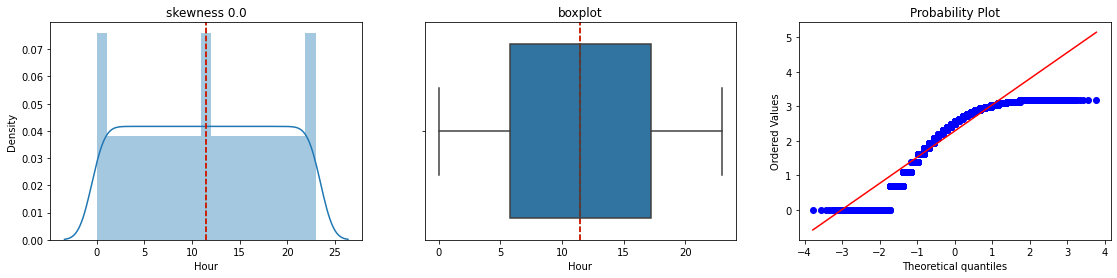

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


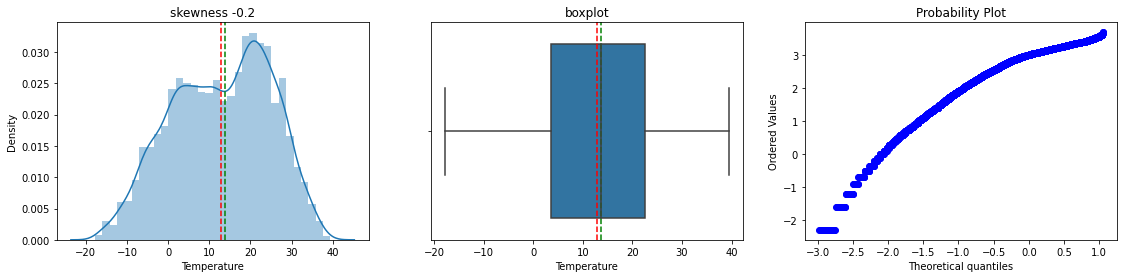

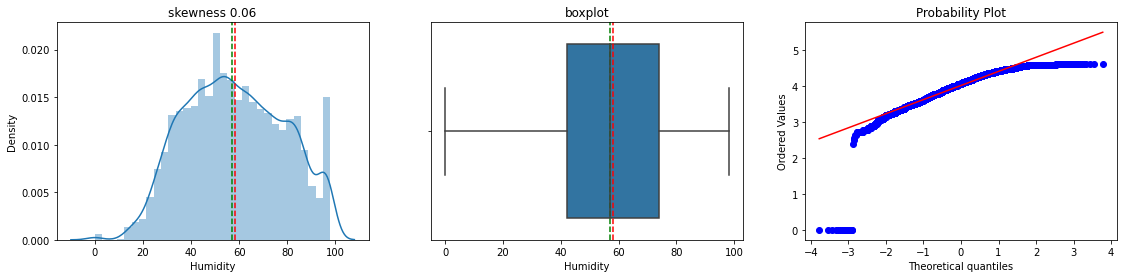

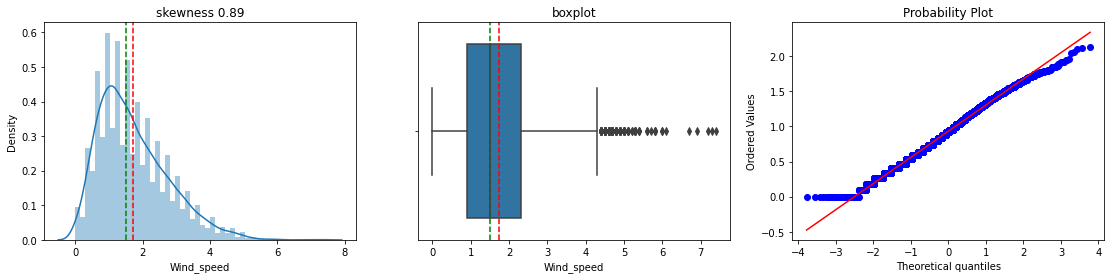

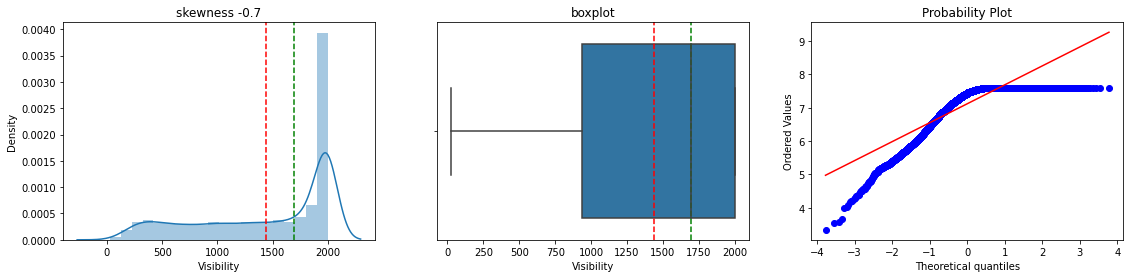

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


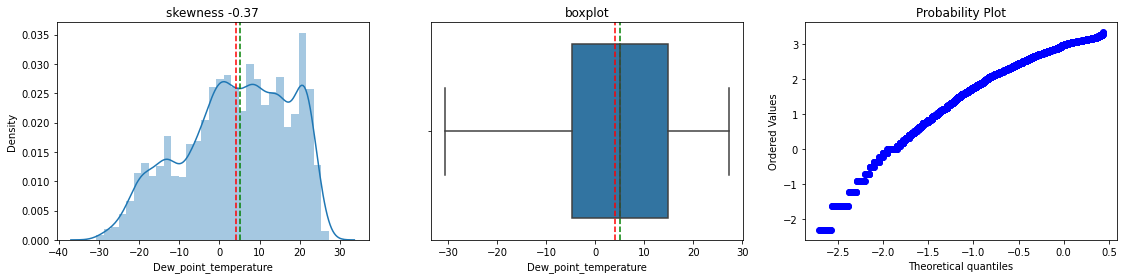

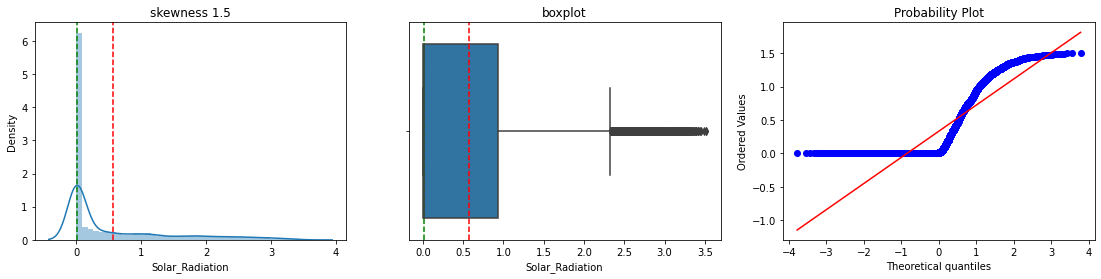

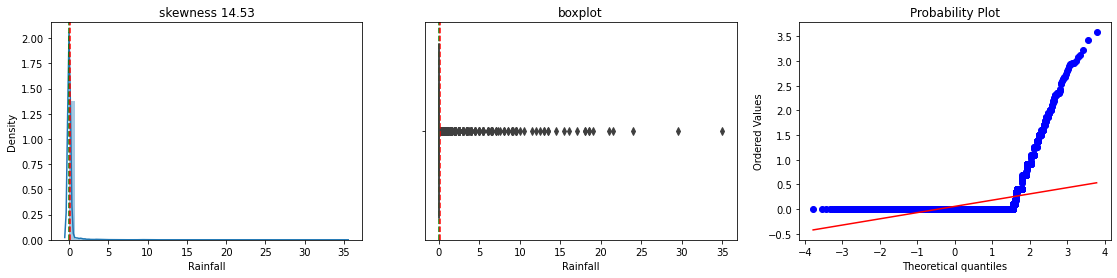

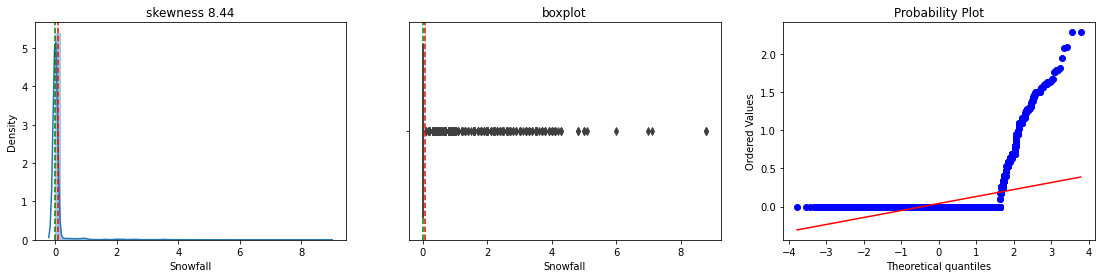

In [ ]:
# density plot of numerical columns
# Distribution of numeric_features

for col in num_attribs[1:-2]:

  plt.figure(figsize=(19,4))

  plt.subplot(1, 3, 1)
  sns.distplot(bike_rent[col], kde=True)
  plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
  plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  
  plt.title(f'skewness {round(bike_rent[col].skew(),2)}')

  plt.subplot(1, 3, 2)
  sns.boxplot(bike_rent[col])
  plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
  plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  
  plt.title('boxplot') 
   
  plt.subplot(1,3,3)
  stats.probplot(np.log1p(bike_rent[col]), plot=plt)

  plt.show()

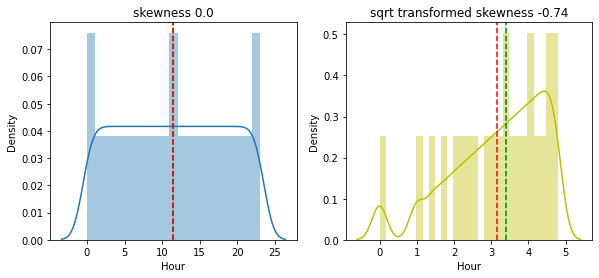

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


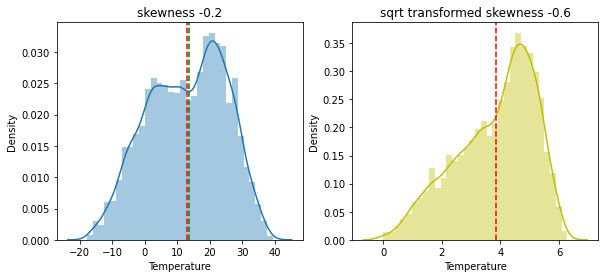

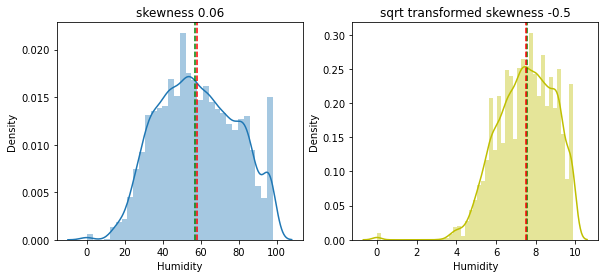

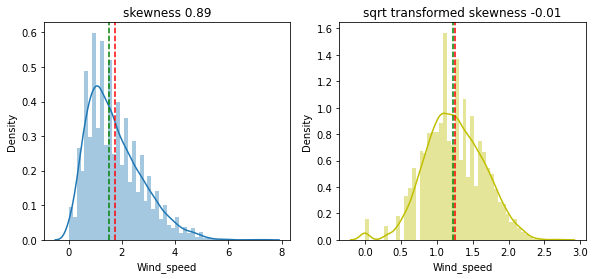

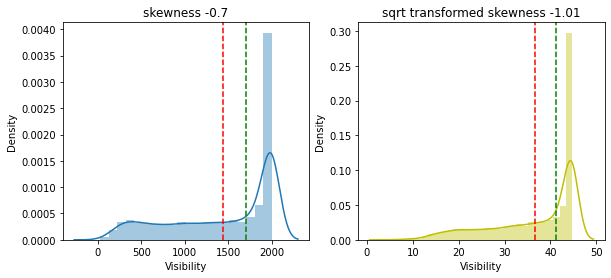

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


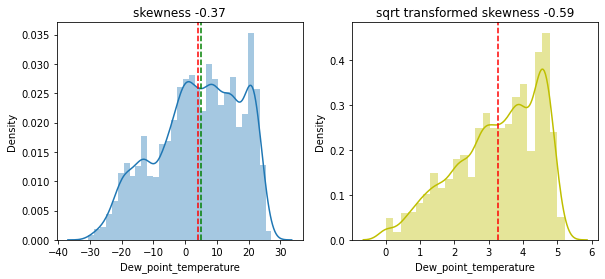

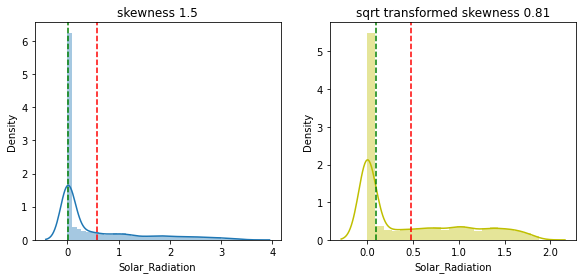

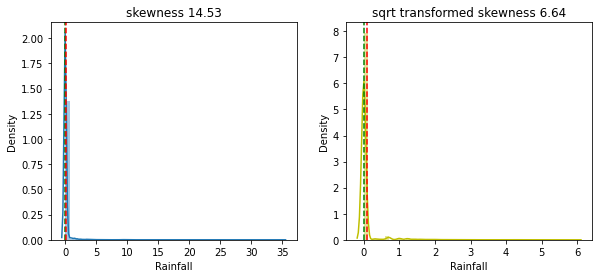

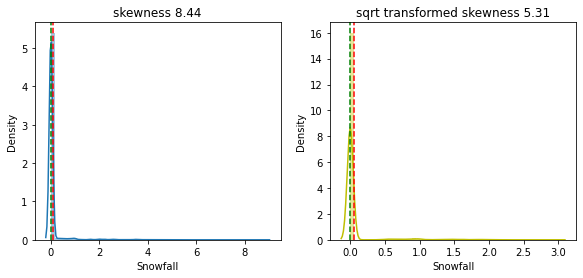

In [ ]:
# transfrming Distribution of numeric_features

for col in num_attribs[1:-2]:

  plt.figure(figsize=(15,4))

  plt.subplot(1, 3, 1)
  sns.distplot(bike_rent[col], kde=True)
  plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
  plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  
  plt.title(f'skewness {round(bike_rent[col].skew(),2)}')

  plt.subplot(1, 3, 2)
  sns.distplot(np.sqrt(bike_rent[col]), kde=True, color="y")
  plt.axvline(np.median(np.sqrt(bike_rent[col])), color='g', linestyle='--')
  plt.axvline(np.mean(np.sqrt(bike_rent[col])),color='r', linestyle='--')
  plt.title(f'sqrt transformed skewness {round((np.sqrt(bike_rent[col])).skew(),2)}')
  plt.show()

In [ ]:
# Categorical features

cat_attribs = bike_rent.describe(include = "object").columns
cat_attribs

Index(['Seasons', 'Holiday', 'Functioning_Day', 'month', 'weekday'], dtype='object')

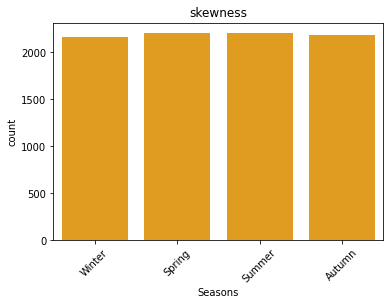

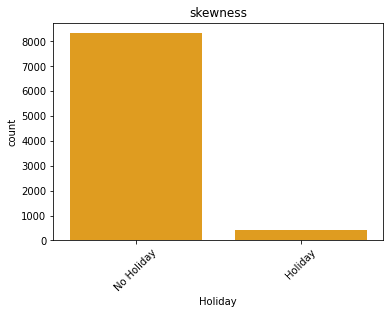

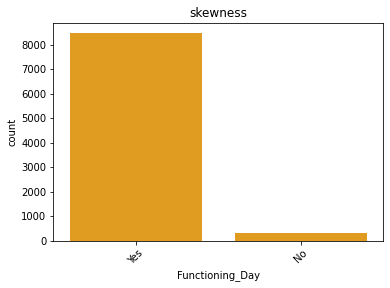

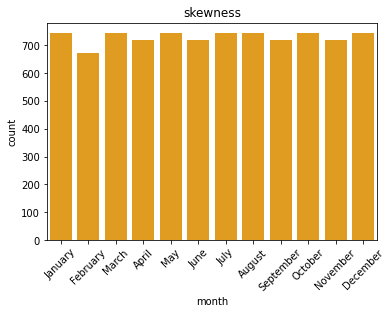

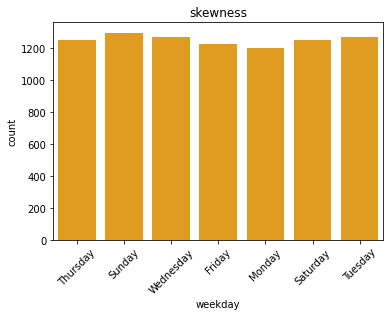

In [ ]:
# density plot of numerical columns
# Distribution of numeric_features

for col in cat_attribs:

  plt.figure(figsize=(13,4))

  plt.subplot(1, 2, 1)
  sns.countplot(bike_rent[col], color="orange")
  plt.title(f'skewness')   
  plt.xticks(rotation = 45)
  plt.show()  
  

##Bivariate

### Target column Rented_Bike_Count

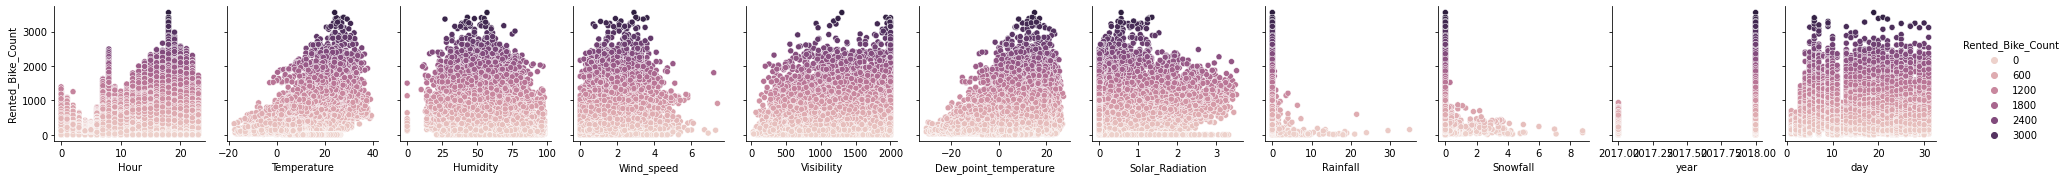

In [ ]:
# Check for linear relationship between dependent and numerical independent variables

sns.pairplot(data = bike_rent, hue="Rented_Bike_Count" , y_vars="Rented_Bike_Count") 

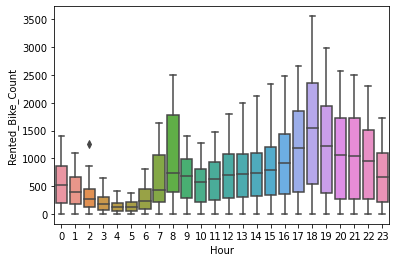

In [ ]:
sns.boxplot(y= bike_rent.Rented_Bike_Count, x=bike_rent.Hour) 

In [ ]:
bike_rent[num_attribs].head(1)

Rented_Bike_Count  Hour  Temperature  ...  Snowfall  year  day
0                254     0         -5.2  ...       0.0  2017   12

[1 rows x 12 columns]

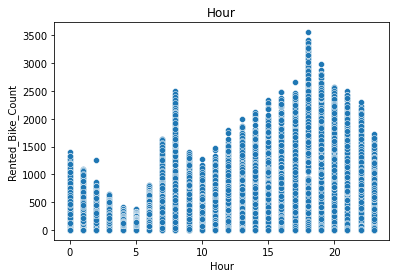

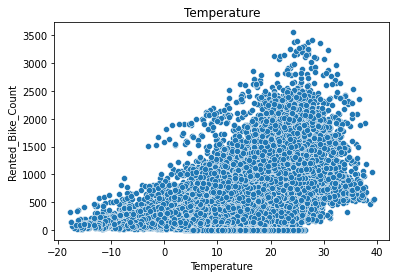

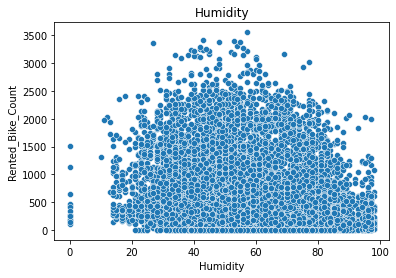

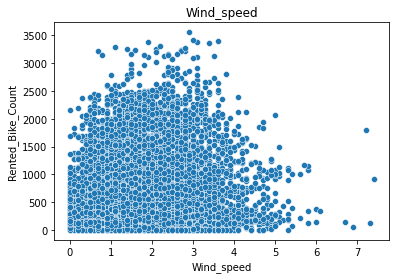

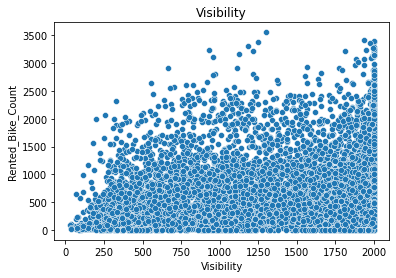

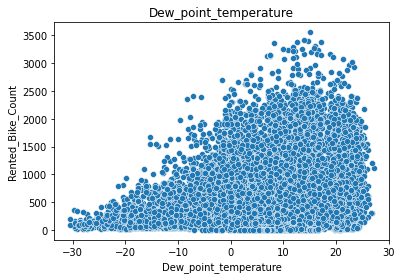

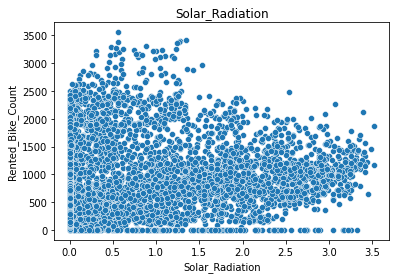

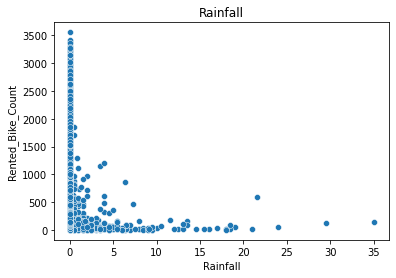

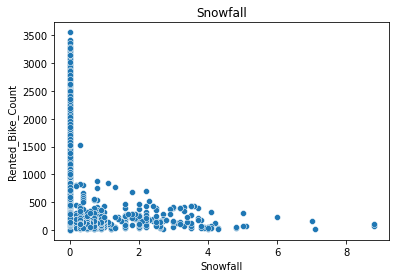

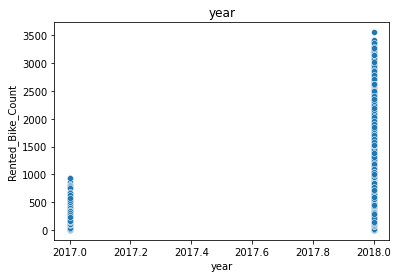

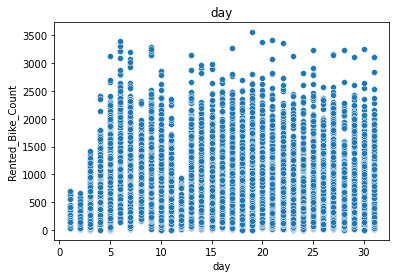

In [ ]:
# col = 'Hour'

for col in num_attribs[1:]:
  sns.scatterplot(y= bike_rent.Rented_Bike_Count, x=bike_rent[col])
  plt.title(col)
  plt.show()

* **PLOT We like to see Count vs hour**
* **high Bike rent happen between 5 deg to 35 deg**
* **Renter prefer renting when Humidity is between 20% to 90%**
* **renter dont like biking when windspeed is higher then 4.8Km\hr**
* **Renter don't prefer renting in rainfall and snowfall**
* ****


###1st coloumn "Date"

In [ ]:
print('Dateset range from ',  bike_rent.Date.nsmallest(1)[0], ' to ', bike_rent.Date.nlargest(1)[8304])

Dateset range from  2017-01-12 00:00:00  to  2018-12-11 00:00:00


In [ ]:
bike_rent.Date.nsmallest(1)[0]-bike_rent.Date.nlargest(1)[8304] 

Timedelta('-698 days +00:00:00')

* **We have approx 23 months of data from jan 2017 to dec 2018**

(array([736330., 736420., 736511., 736603., 736695., 736785., 736876.,
        736968., 737060.]), <a list of 9 Text major ticklabel objects>)

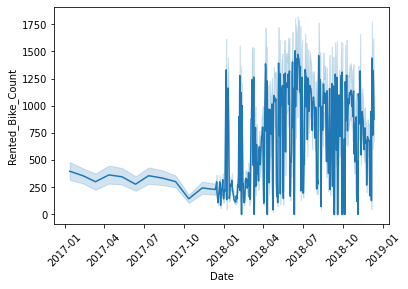

In [ ]:
# bike_df["Date"]
sns.lineplot(x = bike_rent.Date, y = bike_rent.Rented_Bike_Count)
plt.xticks(rotation = 45)

* **we can see rent bike count suddenly increse from jan 2018**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

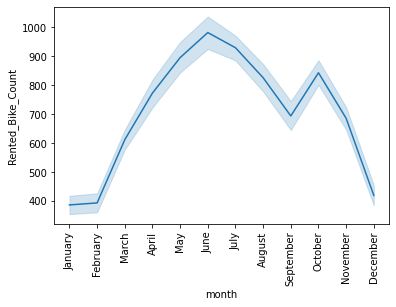

In [ ]:
# by month
sns.lineplot(x = bike_rent.month, y = bike_rent.Rented_Bike_Count)
plt.xticks(rotation = 90)

* **From November to febrary renting bike decrease and June to September also**

* **from February to June is sudden rise in renting and September to Octuber also** 

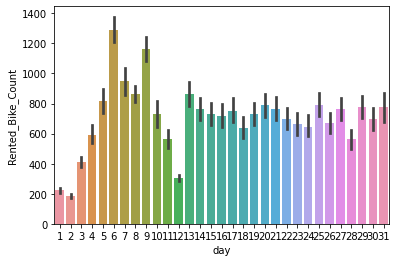

In [ ]:
# by day
sns.barplot(x = bike_rent.day, y = bike_rent.Rented_Bike_Count)

* **From 12 to 30 the renting bike is consolidation**

* **There is increase in renting in first 7 days**

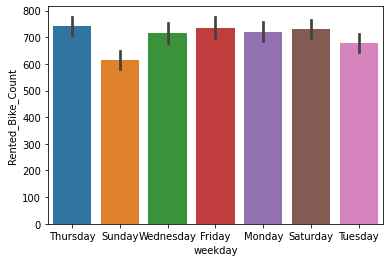

In [ ]:
sns.barplot(x = bike_rent.weekday , y = bike_rent.Rented_Bike_Count ) 

* **Sunday have lowest renting**
* **from Monday to Friday have high renting**

###3rd column hour

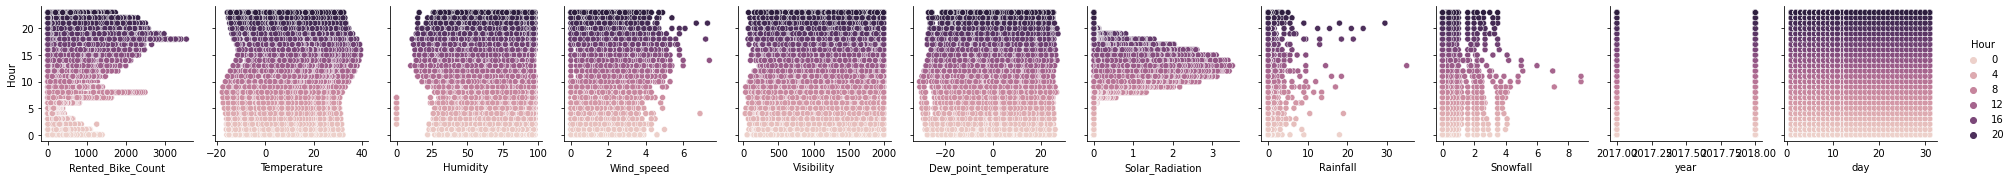

In [ ]:
sns.pairplot(data = bike_rent, hue="Hour", y_vars="Hour") 

* **tempreture,Windspeed,solar radition is higher in daylight then night**
* **Humidity is less between daylight then night**


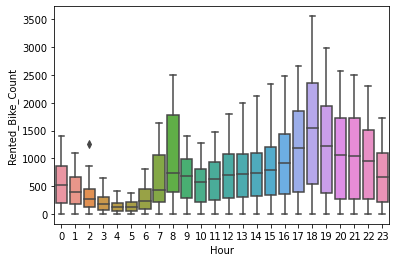

In [ ]:
sns.boxplot(x = bike_rent.Hour, y = bike_rent.Rented_Bike_Count)

* **we see that**
** **5-8 bike increase beacuse WORKER rent bike**
** **10-18 renting increaase sue to**
** **17-18 is high beaacuse worker use them and also people use to wander/cycle**

* ****

###4th column temperature 

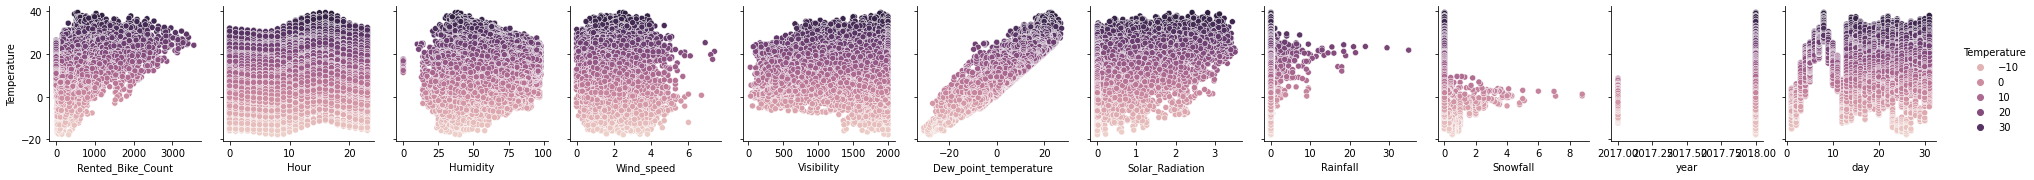

In [ ]:
sns.pairplot(data = bike_rent, hue="Temperature", y_vars="Temperature") 

In [ ]:
print('Tempreture range from ',  bike_rent.Temperature.nsmallest(1)[1352], ' to ', bike_rent.Temperature.nlargest(1)[5848])

Tempreture range from  -17.8  to  39.4


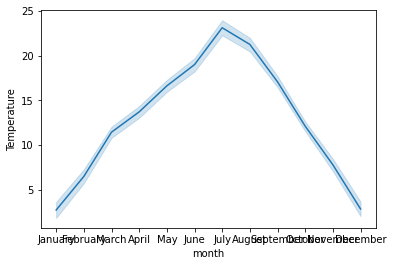

In [ ]:
sns.lineplot(x = bike_rent.month , y = bike_rent.Temperature )

###5th column temperature Humidity

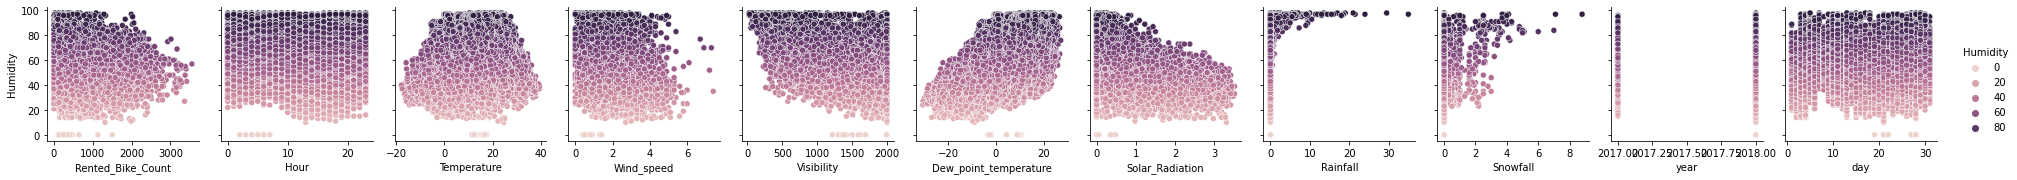

In [ ]:
 sns.pairplot(data = bike_rent, hue="Humidity", y_vars="Humidity") 

###6th column temperature Wind_speed

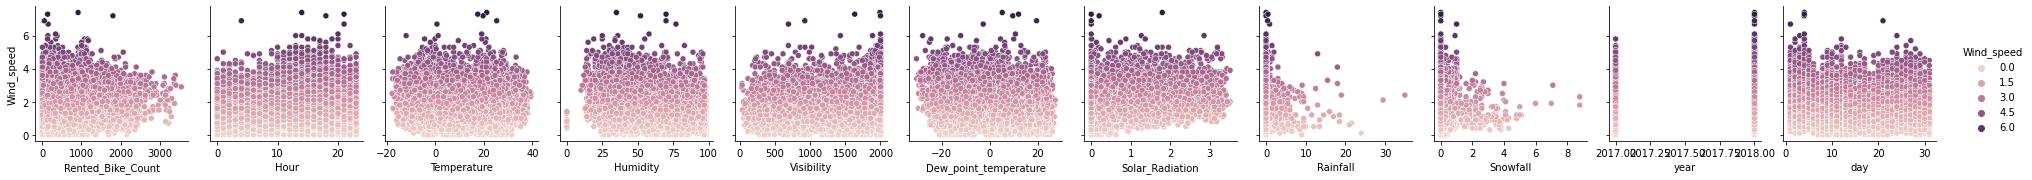

In [ ]:
sns.pairplot(data = bike_rent, hue="Wind_speed", y_vars="Wind_speed") 

###7th column Dew_point_temperature

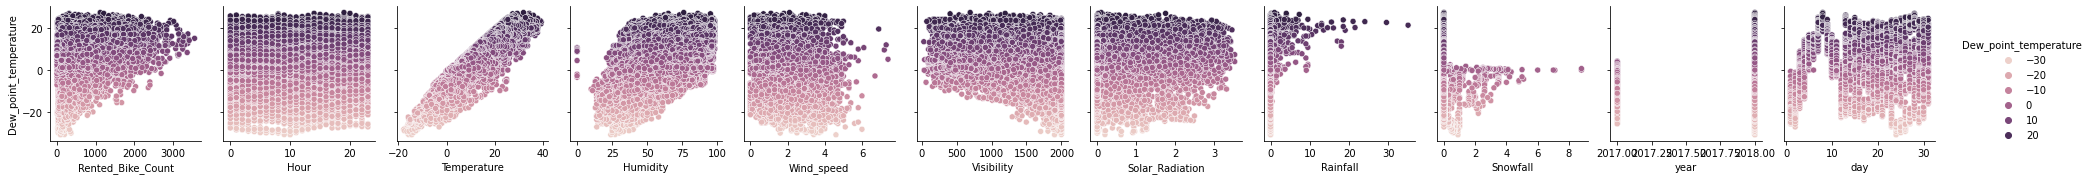

In [ ]:
sns.pairplot(data = bike_rent, hue="Dew_point_temperature", y_vars="Dew_point_temperature") 

###8th column Solar_Radiation

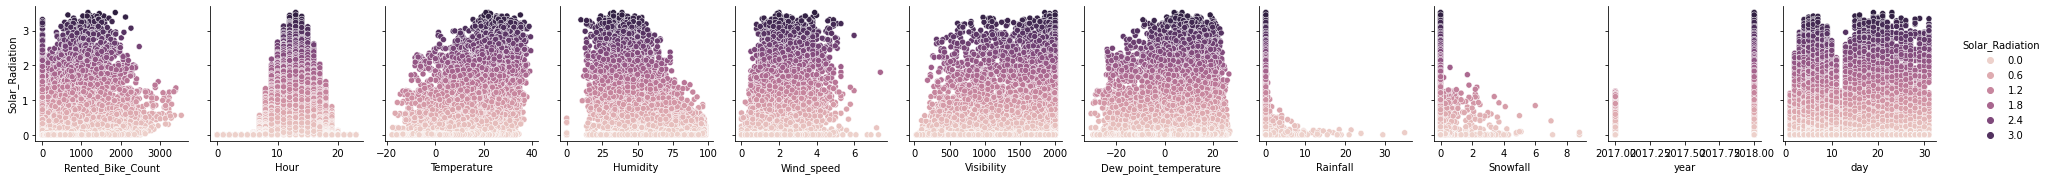

In [ ]:
sns.pairplot(data = bike_rent, hue="Solar_Radiation", y_vars="Solar_Radiation") 

###9th column Rainfall

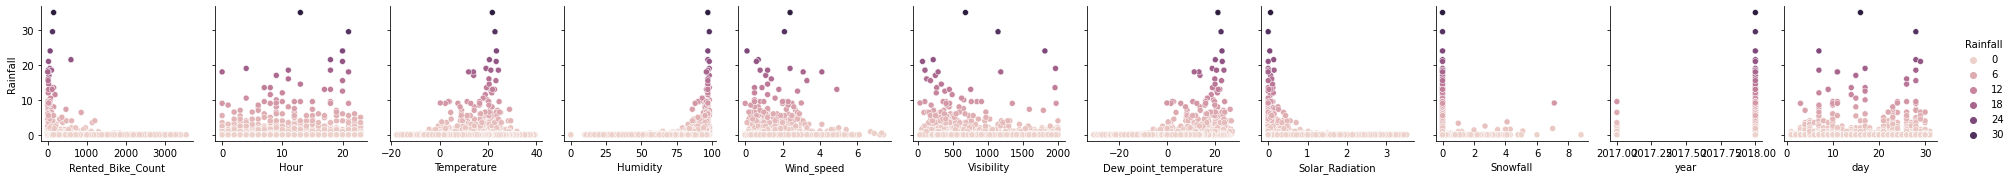

In [ ]:
 sns.pairplot(data = bike_rent, hue="Rainfall", y_vars="Rainfall") 

###10th column Snowfall

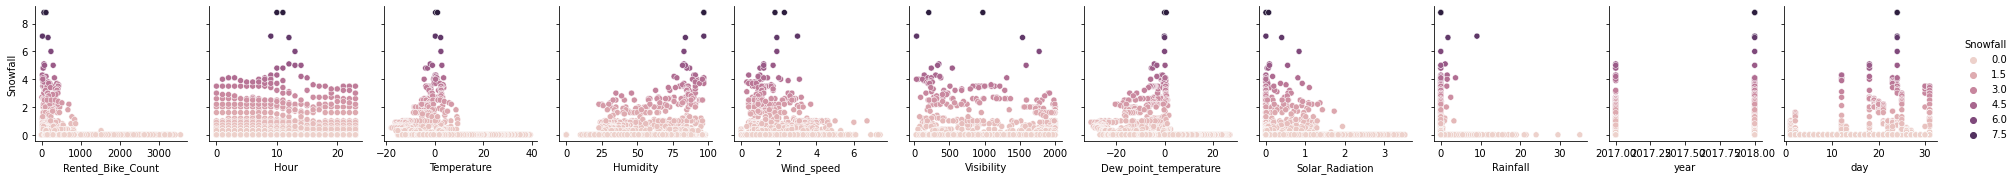

In [ ]:
 sns.pairplot(data = bike_rent, hue="Snowfall", y_vars="Snowfall") 

###11th column Seasons

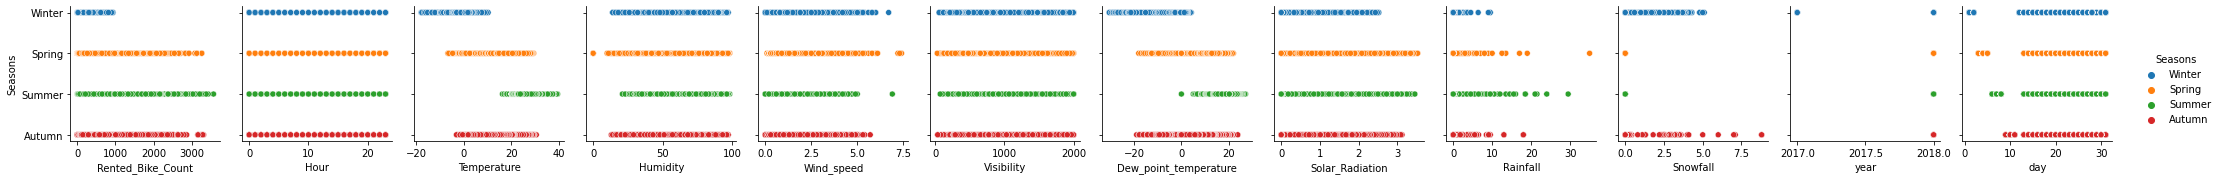

In [ ]:
 sns.pairplot(data = bike_rent, hue="Seasons", y_vars="Seasons") 

###12th column Holiday

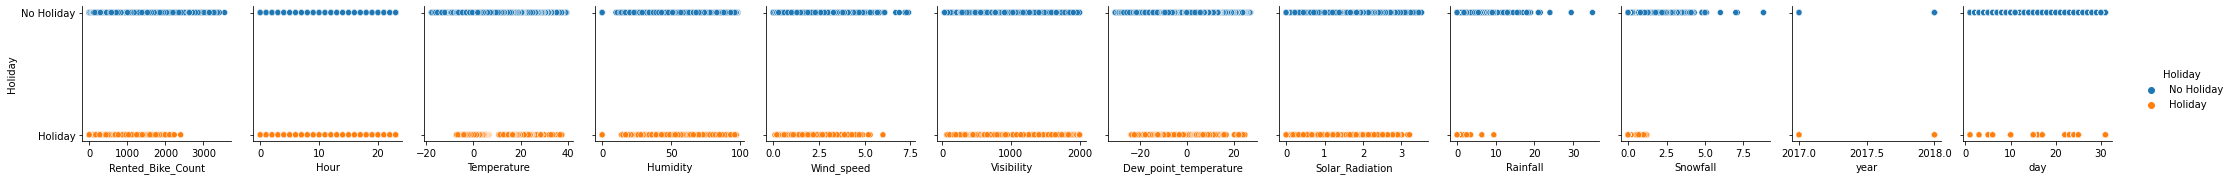

In [ ]:
 sns.pairplot(data = bike_rent, hue="Holiday", y_vars="Holiday") 

###13th column Functioning_Day

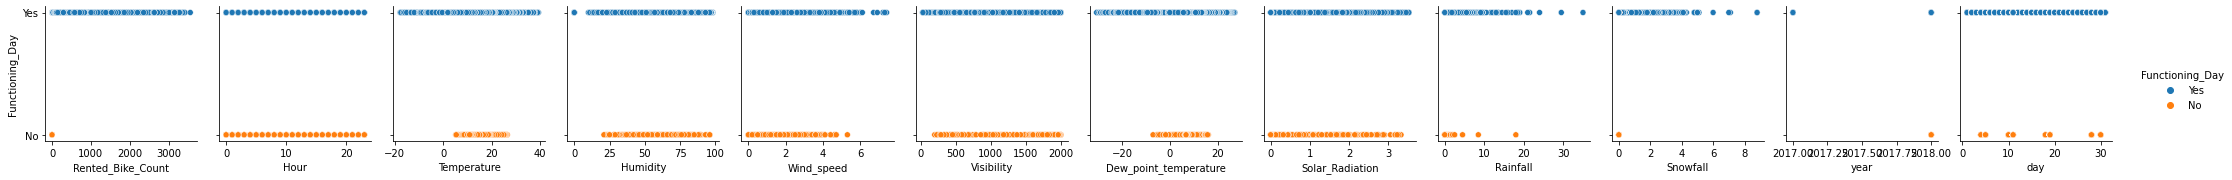

In [ ]:
 sns.pairplot(data = bike_rent, hue="Functioning_Day", y_vars="Functioning_Day") 

## Multivariate (Looking for coreealtion)

In [ ]:
corr_matrix = bike_rent.corr()
corr_matrix["Rented_Bike_Count"].sort_values(ascending=False)

Rented_Bike_Count        1.000000
Temperature              0.538558
Hour                     0.410257
Dew_point_temperature    0.379788
Solar_Radiation          0.261837
year                     0.215162
Visibility               0.199280
Wind_speed               0.121108
day                      0.046849
Rainfall                -0.123074
Snowfall                -0.141804
Humidity                -0.199780
Name: Rented_Bike_Count, dtype: float64

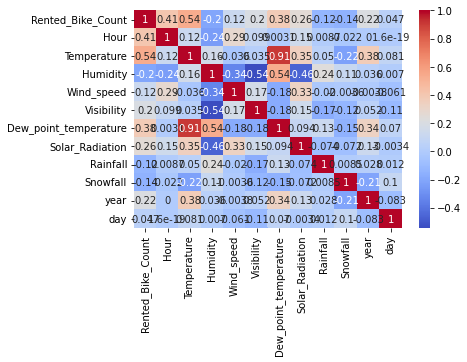

In [ ]:
sns.heatmap(data = corr_matrix, annot = True, cmap = "coolwarm")
plt.show()

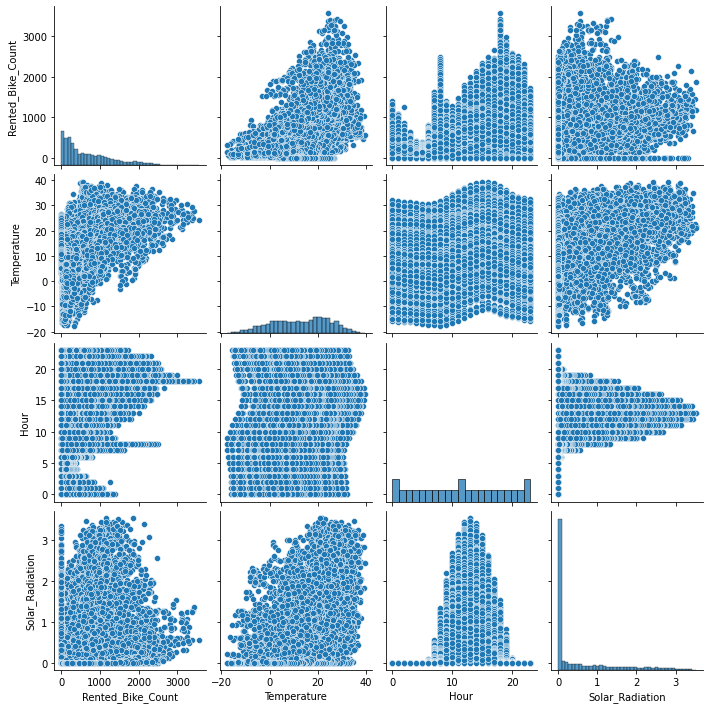

In [ ]:
attributes = ['Rented_Bike_Count', 'Temperature' ,'Hour' ,
              'Solar_Radiation' ]
sns.pairplot(data = bike_rent, x_vars = attributes, y_vars = attributes)

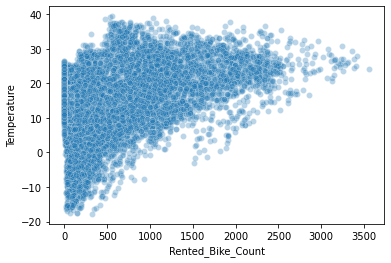

In [ ]:
sns.scatterplot(x = bike_rent.Rented_Bike_Count, y = bike_rent.Temperature, alpha=0.3  )

In [ ]:
bike_rent.head(3)

Date  Rented_Bike_Count  Hour  ...    month  day   weekday
0 2017-01-12                254     0  ...  January   12  Thursday
1 2017-01-12                204     1  ...  January   12  Thursday
2 2017-01-12                173     2  ...  January   12  Thursday

[3 rows x 18 columns]

#Prepareing data for MLA

In [ ]:
bike_rent_df = bike_rent.copy()

In [ ]:
bike_rent = bike_rent_df.drop(["Rented_Bike_Count",'Date'], axis=1) # drop labels for training set
bike_rent_labels = bike_rent_df["Rented_Bike_Count"].copy()

In [ ]:
# Numeical features

num_attribs = bike_rent.describe().columns
num_attribs

Index(['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'year', 'day'],
      dtype='object')

* Light rain — when the precipitation rate is < 2.5 mm (0.098 in) per hour

* Moderate rain — when the precipitation rate is between 2.5 mm (0.098 in) – 7.6 mm (0.30 in) or 10 mm (0.39 in) per hour[106][107]

* Heavy rain — when the precipitation rate is > 7.6 mm (0.30 in) per hour,[106] 
or between 10 mm (0.39 in) and 50 mm (2.0 in) per hour[107]

* Violent rain — when the precipitation rate is > 50 mm (2.0 in) per hour[107]:

In [ ]:
bike_rent_num = bike_rent[num_attribs]
bike_rent_num.head(3) 

Hour  Temperature  Humidity  Wind_speed  ...  Rainfall  Snowfall  year  day
0     0         -5.2        37         2.2  ...       0.0       0.0  2017   12
1     1         -5.5        38         0.8  ...       0.0       0.0  2017   12
2     2         -6.0        39         1.0  ...       0.0       0.0  2017   12

[3 rows x 11 columns]

In [ ]:
cat_attribs = bike_rent.describe(include = "object").columns.to_list()
cat_attribs 

['Seasons', 'Holiday', 'Functioning_Day', 'month', 'weekday']

In [ ]:
bike_rent_cat = bike_rent[cat_attribs]
bike_rent_cat.head(3) 

Seasons     Holiday Functioning_Day    month   weekday
0  Winter  No Holiday             Yes  January  Thursday
1  Winter  No Holiday             Yes  January  Thursday
2  Winter  No Holiday             Yes  January  Thursday

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bike_rent , bike_rent_labels, test_size = 0.2, random_state = 0)

##pipeline

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
                                   
                                   ('std_scaler', StandardScaler(), num_attribs),
                                   ('cat', OneHotEncoder(), cat_attribs)
        ])
bike_rent_prepared = full_pipeline.fit_transform(X_train)

In [ ]:
X = bike_rent
y = bike_rent_labels 

# Modeling

## Linear Regeression

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(bike_rent_prepared, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

216.26621533747823

In [ ]:
regressor.coef_

array([ 185.55365687,  221.29434532, -218.06464257,   18.39428424,
         22.3616074 ,  134.58548294,  -75.35434319,  -63.9398226 ,
         13.87534815,  -20.96363417,   -8.84016751,  159.10394562,
         40.41165644,  -13.51250164, -186.00310042,  -61.59757935,
         61.59757935, -466.41447686,  466.41447686,   -5.83159502,
       -100.80525131,   -2.30144673,  -64.68164844,   -2.73919455,
        -61.8401665 ,  223.08337264,  -51.46742839,   60.26595357,
        -34.6095886 ,   69.4147081 ,  -28.48771478,   35.79532186,
         24.36363406,    5.4729341 ,  -55.82328458,   -6.84470787,
        -15.33673442,   12.37283686])

In [ ]:
y_pred_train = regressor.predict(bike_rent_prepared)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(full_pipeline.transform (X_test))

In [ ]:
#Predicted profit on the test data
y_pred

array([ 502.98321294,  774.10725003,  628.7146048 , ...,  190.03852448,
       1290.51478905,  624.8168874 ])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

185043.49593436575

In [ ]:
import math
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

422.3489746553308

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

430.16682337712393

In [ ]:

from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.5704234688483911

In [ ]:
r2_score(y_test, y_pred)

0.5578649730286983